<a href="https://colab.research.google.com/github/ailtiakova/miro/blob/main/Miro_Task_1_Sample_Size_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

In [ ]:
def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=0.2*n, n2=0.8*n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

In [ ]:
p_diffs = [x*.005 for x in range(1,11)]

data = []
for p_diff in p_diffs:
    record = {}
    record['Lift'] = p_diff * 100
    record['Sample Size Required'] = sample_required(p1=.05,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '5%'
    data.append(record)

df = pd.DataFrame(data)
print(df)

   Lift  Sample Size Required Confidence Level Initial probability
0   0.5                 34553              95%                  5%
1   1.0                  9239              95%                  5%
2   1.5                  4371              95%                  5%
3   2.0                  2606              95%                  5%
4   2.5                  1762              95%                  5%
5   3.0                  1288              95%                  5%
6   3.5                   993              95%                  5%
7   4.0                   796              95%                  5%
8   4.5                   657              95%                  5%
9   5.0                   554              95%                  5%


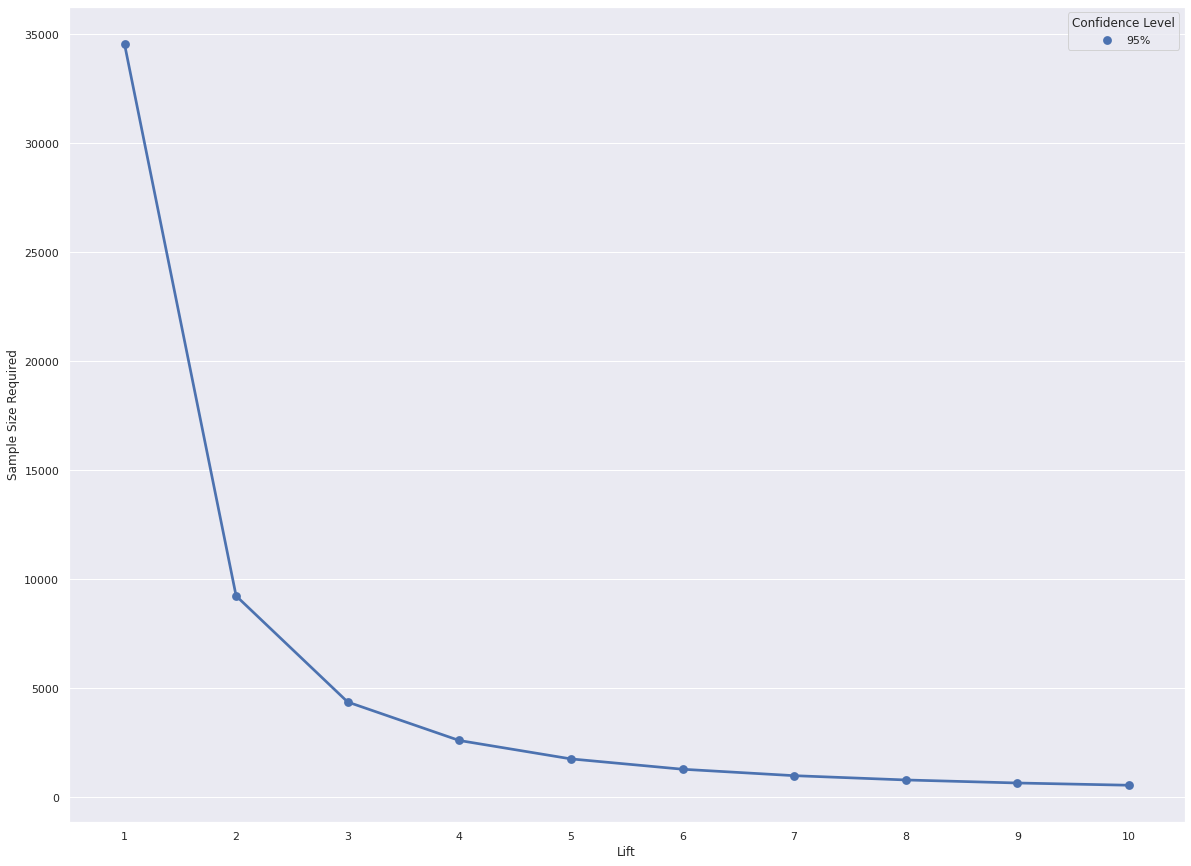

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(20,15))

sns.set(style='darkgrid')

plot = sns.pointplot(x='Lift',
            y='Sample Size Required',
            hue='Confidence Level', ax = ax,
            data=df)

labels = []
for i in range(1, 11):
    if i % 1 == 0:
        labels.append(str(i))
    else:
        labels.append('')
plot.set_xticklabels(labels=labels);